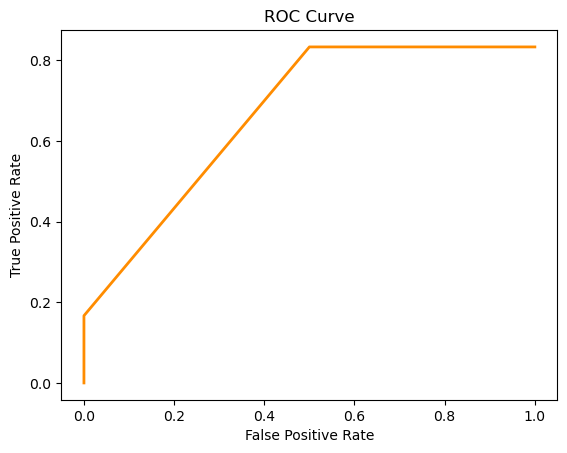

In [8]:
import matplotlib.pyplot as plt

confidence_scores = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
actual_class = ['+', '+', '-', '+', '+', '-', '+', '+', '-', '-']

sorted_indices = sorted(range(len(confidence_scores)), key=lambda k: confidence_scores[k], reverse=True)
sorted_scores = [confidence_scores[i] for i in sorted_indices]
sorted_actual = [actual_class[i] for i in sorted_indices]

num_neg = sum(1 for c in sorted_actual if c == '-')
num_pos = sum(1 for c in sorted_actual if c == '+')
TP = 0
FP = 0
last_TP = 0

fpr = [0]
tpr = [0]
for i in range(1, len(sorted_scores)):
    if i > 1 and sorted_scores[i] != sorted_scores[i-1] and sorted_actual[i] == '-' and TP > last_TP:
        FPR = FP / num_neg
        TPR = TP / num_pos
        fpr.append(FPR)
        tpr.append(TPR)
        last_TP = TP
    
    if sorted_actual[i] == '+':
        TP += 1
    else:
        FP += 1

FPR = FP / num_neg
TPR = TP / num_pos
fpr.append(FPR)
tpr.append(TPR)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC curve')
plt.show()
